# Occupation - Manager or Professional, 2011 and 2016

### Import libraries, Import data, Get a clean dataframe

In [1]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
import numpy as np
from datetime import datetime
from datetime import date
import statsmodels.api as sm
import geopandas as gpd
from geopandas import GeoDataFrame
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#read in B45B Table (2011): Occupation by Age by Sex
b45 = pd.read_csv('C:\\Users\\ryanm\\Box\\Shared 228 Sydney Folder\\AU Work\\2011_census_files\\SA2_NSW\\2011Census_B45B_NSW_SA2_short.csv')

#read in G57B Table (2016): Occupation by Age by Sex
g57 = pd.read_csv('C:\\Users\\ryanm\\Box\\Shared 228 Sydney Folder\\AU Work\\2016_census_files\\SA2_NSW\\2016Census_G57B_NSW_SA2.csv')

#read in the correspondence file 2011<->2016
corr = pd.read_csv('C:\\Users\\ryanm\\Box\\Shared 228 Sydney Folder\\AU Work\\2011_2016_correspondence\\2011_2016_corr.csv')

### Cleaning 2011 Table B45B

In [3]:
b45.head()

,region_id,P15_19_Managers,P15_19_Professionals,P15_19_TechnicTrades_Wrs,P15_19_CommunPersnlSvc_W,P15_19_ClericalAdminis_W,P15_19_Sales_W,P15_19_Mach_oper_drivers,P15_19_Labourers,P15_19_Occu_ID_NS,P15_19_Tot,P20_24_Managers,P20_24_Professionals,P20_24_TechnicTrades_W,P20_24_CommunPersnlSvc_W,P20_24_ClericalAdminis_W,P20_24_Sales_W,P20_24_Mach_oper_drivers,P20_24_Labourers,P20_24_Occu_ID_NS,P20_24_Tot,P25_34_Managers,P25_34_Professionals,P25_34_TechnicTrades_W,P25_34_CommunPersnlSvc_W,P25_34_ClericalAdminis_W,P25_34_Sales_W,P25_34_Mach_oper_drivers,P25_34_Labourers,P25_34_Occu_ID_NS,P25_34_Tot,P35_44_Managers,P35_44_Professionals,P35_44_TechnicTrades_W,P35_44_CommunPersnlSvc_W,P35_44_ClericalAdminis_W,P35_44_Sales_W,P35_44_Mach_oper_drivers,P35_44_Labourers,P35_44_Occu_ID_NS,P35_44_Tot,P45_54_Managers,P45_54_Professionals,P45_54_TechnicTrades_W,P45_54_CommunPersnlSvc_W,P45_54_ClericalAdminis_W,P45_54_Sales_W,P45_54_Mach_oper_drivers,P45_54_Labourers,P45_54_Occu_ID_NS,P45_54_Tot,P55_64_Managers,P55_64_Professionals,P55_64_TechnicTrades_W,P55_64_CommunPersnlSvc_W,P55_64_ClericalAdminis_W,P55_64_Sales_W,P55_64_Mach_oper_drivers,P55_64_Labourers,P55_64_Occu_ID_NS,P55_64_Tot,P65_74_Managers,P65_74_Professionals,P65_74_TechnicTrades_W,P65_74_CommunPersnlSvc_W,P65_74_ClericalAdminis_W,P65_74_Sales_W,P65_74_Mach_oper_drivers,P65_74_Labourers,P65_74_Occu_ID_NS,P65_74_Tot,P75_84_Managers,P75_84_Professionals,P75_84_TechnicTrades_W,P75_84_CommunPersnlSvc_W,P75_84_ClericalAdminis_W,P75_84_Sales_W,P75_84_Mach_oper_drivers,P75_84_Labourers,P75_84_Occu_ID_NS,P75_84_Tot,P85_ov_Managers,P85_ov_Professionals,P85_ov_TechnicTrades_W,P85_ov_CommunPersnlSvc_W,P85_ov_ClericalAdminis_W,P85_ov_Sales_W,P85_ov_Mach_oper_drivers,P85_ov_Labourers,P85_ov_Occu_ID_NS,P85_ov_Tot,P_Tot_Managers,P_Tot_Professionals,P_Tot_TechnicTrades_W,P_Tot_CommunPersnlSvc_W,P_Tot_ClericalAdminis_W,P_Tot_Sales_W,P_Tot_Mach_oper_drivers,P_Tot_Labourers,P_Tot_Occu_ID_NS,P_Tot_Tot
0,101011001,12,16,124,101,43,251,15,122,7,691,54,58,211,180,104,121,38,114,9,889,148,246,278,288,248,166,132,203,26,1735,219,283,305,373,273,167,191,218,18,2047,253,354,238,355,331,151,223,266,41,2212,173,291,137,182,211,102,162,177,25,1460,35,71,18,19,30,23,40,34,7,277,10,14,4,0,3,9,3,0,3,46,0,0,0,0,0,0,0,0,5,5,904,1333,1315,1498,1243,990,804,1134,141,9362
1,101011002,3,3,87,36,9,88,4,78,6,314,18,16,81,47,32,34,17,45,3,293,98,85,113,83,65,40,54,64,6,608,221,159,178,151,155,73,99,89,24,1149,315,237,180,150,181,82,119,137,24,1425,356,205,123,78,125,55,65,104,23,1134,209,42,29,15,29,12,14,24,6,380,94,8,0,0,3,0,3,8,5,121,11,0,0,0,0,0,0,0,0,11,1325,755,791,560,599,384,375,549,97,5435
2,101011003,3,6,39,42,5,69,3,55,7,229,14,20,80,42,28,23,12,43,6,268,54,112,100,64,73,37,29,58,9,536,101,156,96,86,133,64,40,55,8,739,111,102,108,75,122,34,51,55,13,671,61,89,43,51,79,29,54,50,8,464,26,13,9,8,10,10,12,8,3,99,9,7,0,0,0,0,0,0,0,16,3,0,0,0,0,0,0,0,0,3,382,505,475,368,450,266,201,324,54,3025
3,101011004,8,3,58,75,22,56,3,72,4,301,16,35,69,34,50,37,18,30,0,289,115,138,120,58,121,36,38,56,22,704,303,363,197,112,248,55,52,83,35,1448,368,358,168,90,238,52,68,92,38,1472,328,241,79,52,147,37,39,74,22,1019,162,63,21,6,26,14,8,18,7,325,32,3,3,0,3,3,0,7,0,51,3,0,0,0,0,0,0,0,0,3,1335,1204,715,427,855,290,226,432,128,5612
4,101011005,6,0,71,25,11,119,5,62,8,307,14,30,99,34,30,55,15,67,12,356,78,126,126,69,78,86,44,107,10,724,141,149,148,87,115,93,55,123,11,922,146,135,122,97,126,95,75,134,17,947,116,106,88,60,102,56,53,74,19,674,46,24,21,7,20,12,13,22,3,168,15,3,0,0,0,6,0,6,6,36,0,0,0,0,0,0,0,0,4,4,562,573,675,379,482,522,260,595,90,4138


In [4]:
#keep only the SA2 and managers, professionals, totals columns

b45 = b45[['region_id', 'P_Tot_Managers', 'P_Tot_Professionals', 'P_Tot_Tot']]

In [5]:
#sum managers and professionals

b45['mgr_prf_11'] = (b45['P_Tot_Managers'] + b45['P_Tot_Professionals'])

In [6]:
b45.rename(columns={'region_id':'SA2_MAINCODE_2011', 'P_Tot_Tot':'total_11'}, inplace=True)

### Correspondence: Fitting 2011 Data to 2016 Geographies

In [7]:
#merge many:many, joining income B45 table (NSW) to the correspondence table (all of Australia)

occ_2011 = pd.merge(b45,corr,on='SA2_MAINCODE_2011',how='right')

In [8]:
#apply correspondence ratio to 2011 data to fit to 2016 SA2 areas

occ_2011['mgr_prf_11_sa2'] = occ_2011['mgr_prf_11'] * occ_2011['RATIO']
occ_2011['total_11_sa2'] = occ_2011['total_11'] * occ_2011['RATIO']

In [9]:
#pull csv and pivot in Excel

occ_2011.to_csv('C:\\Users\\ryanm\\Box\\Shared 228 Sydney Folder\\AU Work\\Indv Work Folder\\Ryan Work Folder\\occ_2011.csv',index=False)

In [10]:
#read back in pivoted data

occ_2011_sa2 = pd.read_csv('C:\\Users\\ryanm\\Box\\Shared 228 Sydney Folder\\AU Work\\Indv Work Folder\\Ryan Work Folder\\occ_2011_sa2.csv')

### Cleaning 2016 Table G57

In [11]:
g57.head()

,SA2_MAINCODE_2016,P15_19_Managers,P15_19_Professionals,P15_19_TechnicTrades_Wrs,P15_19_CommunPersnlSvc_W,P15_19_ClericalAdminis_W,P15_19_Sales_W,P15_19_Mach_oper_drivers,P15_19_Labourers,P15_19_Occu_ID_NS,P15_19_Tot,P20_24_Managers,P20_24_Professionals,P20_24_TechnicTrades_W,P20_24_CommunPersnlSvc_W,P20_24_ClericalAdminis_W,P20_24_Sales_W,P20_24_Mach_oper_drivers,P20_24_Labourers,P20_24_Occu_ID_NS,P20_24_Tot,P25_34_Managers,P25_34_Professionals,P25_34_TechnicTrades_W,P25_34_CommunPersnlSvc_W,P25_34_ClericalAdminis_W,P25_34_Sales_W,P25_34_Mach_oper_drivers,P25_34_Labourers,P25_34_Occu_ID_NS,P25_34_Tot,P35_44_Managers,P35_44_Professionals,P35_44_TechnicTrades_W,P35_44_CommunPersnlSvc_W,P35_44_ClericalAdminis_W,P35_44_Sales_W,P35_44_Mach_oper_drivers,P35_44_Labourers,P35_44_Occu_ID_NS,P35_44_Tot,P45_54_Managers,P45_54_Professionals,P45_54_TechnicTrades_W,P45_54_CommunPersnlSvc_W,P45_54_ClericalAdminis_W,P45_54_Sales_W,P45_54_Mach_oper_drivers,P45_54_Labourers,P45_54_Occu_ID_NS,P45_54_Tot,P55_64_Managers,P55_64_Professionals,P55_64_TechnicTrades_W,P55_64_CommunPersnlSvc_W,P55_64_ClericalAdminis_W,P55_64_Sales_W,P55_64_Mach_oper_drivers,P55_64_Labourers,P55_64_Occu_ID_NS,P55_64_Tot,P65_74_Managers,P65_74_Professionals,P65_74_TechnicTrades_W,P65_74_CommunPersnlSvc_W,P65_74_ClericalAdminis_W,P65_74_Sales_W,P65_74_Mach_oper_drivers,P65_74_Labourers,P65_74_Occu_ID_NS,P65_74_Tot,P75_84_Managers,P75_84_Professionals,P75_84_TechnicTrades_W,P75_84_CommunPersnlSvc_W,P75_84_ClericalAdminis_W,P75_84_Sales_W,P75_84_Mach_oper_drivers,P75_84_Labourers,P75_84_Occu_ID_NS,P75_84_Tot,P85_ov_Managers,P85_ov_Professionals,P85_ov_TechnicTrades_W,P85_ov_CommunPersnlSvc_W,P85_ov_ClericalAdminis_W,P85_ov_Sales_W,P85_ov_Mach_oper_drivers,P85_ov_Labourers,P85_ov_Occu_ID_NS,P85_ov_Tot,P_Tot_Managers,P_Tot_Professionals,P_Tot_TechnicTrades_W,P_Tot_CommunPersnlSvc_W,P_Tot_ClericalAdminis_W,P_Tot_Sales_W,P_Tot_Mach_oper_drivers,P_Tot_Labourers,P_Tot_Occu_ID_NS,P_Tot_Tot
0,101021007,3,0,19,13,0,14,0,14,3,65,0,6,12,11,7,5,9,13,7,71,22,32,34,21,26,12,15,23,5,199,51,66,53,28,45,12,19,18,5,301,90,76,50,23,57,24,31,42,12,412,105,87,44,21,42,31,28,29,11,392,65,30,10,0,13,5,9,13,3,151,24,8,0,0,0,0,0,0,3,41,3,0,4,0,0,0,0,0,0,6,371,312,222,123,190,108,113,156,47,1646
1,101021008,3,5,39,49,13,103,9,55,0,286,22,27,93,66,72,59,18,38,9,402,83,145,167,91,167,61,46,75,29,860,115,169,132,91,174,54,56,77,20,890,137,136,133,92,227,39,65,85,24,945,73,110,85,70,151,45,61,68,15,667,16,19,13,13,27,4,16,20,0,130,0,0,0,0,0,0,3,0,0,10,0,0,0,0,0,0,0,0,0,0,454,610,671,471,837,365,281,413,97,4184
2,101021009,3,0,22,39,20,77,5,35,3,201,38,55,92,118,96,86,18,56,12,575,182,353,269,225,270,127,87,124,54,1688,162,279,149,144,202,86,56,108,29,1224,143,203,135,109,241,76,66,93,24,1092,69,126,72,70,131,51,43,87,19,672,16,29,7,11,28,17,12,16,3,137,4,7,0,0,0,4,0,4,3,19,0,0,0,0,0,0,0,0,0,0,622,1043,754,714,996,523,296,527,135,5612
3,101021010,0,7,15,26,5,31,3,23,0,102,11,29,68,47,46,40,6,22,11,278,61,162,108,87,131,91,33,67,13,748,82,116,83,50,75,48,31,37,9,515,94,113,54,53,112,29,31,41,10,546,61,67,37,31,77,17,30,37,4,362,9,26,10,7,18,0,7,4,0,78,4,3,0,0,3,0,0,0,0,9,0,0,0,0,0,0,0,0,0,0,323,518,369,302,463,241,147,230,45,2647
4,101021011,4,14,80,111,42,145,6,78,16,504,27,56,153,100,107,82,16,40,4,592,188,315,299,125,261,67,44,82,25,1406,449,522,220,156,383,75,74,61,55,1989,580,575,268,159,467,94,97,119,56,2413,327,375,164,96,279,59,84,74,36,1496,108,84,46,16,40,24,23,22,10,371,16,4,3,0,0,0,5,0,3,39,0,3,0,0,0,0,0,0,0,3,1703,1950,1226,770,1591,540,349,476,205,8814


In [12]:
#sum managers and professionals

g57['mgr_prf_16'] = (g57['P_Tot_Managers'] + g57['P_Tot_Professionals'])

In [13]:
g57.rename(columns={'P_Tot_Tot':'total_16'}, inplace=True)

In [14]:
#keep only the SA2 and managers, professionals, totals columns

occ_2016 = g57[['SA2_MAINCODE_2016', 'mgr_prf_16', 'total_16']].copy()

### Merge 2011 and 2016 Tables

In [15]:
#merge 2011 and 2016 tables
occupation = pd.merge(occ_2011_sa2,occ_2016,on='SA2_MAINCODE_2016',how="right")
occupation

,SA2_MAINCODE_2016,mgr_prf_11_sa2,total_11_sa2,mgr_prf_16,total_16
0,101021007,638.000000,1551.000000,683,1646
1,101021008,1125.000000,4546.000000,1064,4184
2,101021009,1620.000000,5426.000000,1665,5612
3,101021010,866.000000,2713.000000,841,2647
4,101021011,3223.000000,7818.000000,3653,8814
...,...,...,...,...,...
573,128021607,2858.264776,8794.660848,2814,8474
574,128021608,1236.293978,3803.981472,1415,3764
575,128021609,663.441246,2041.357680,786,2187
576,197979799,NaN,NaN,25,130


### Merge SA2 shapes for UCL area

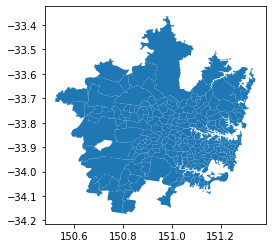

In [16]:
syd_ucl = gpd.read_file('C:\\Users\\ryanm\\Box\\Shared 228 Sydney Folder\\SA2 Shapefiles\\sa2_ucl.dbf')
syd_ucl['SA2_MAIN16']=syd_ucl['SA2_MAIN16'].astype(int)
syd_ucl.plot()

In [17]:
#merge 2011 and 2016 income data with UCL SA2 data
occ_11_16 = pd.merge(syd_ucl, occupation, left_on='SA2_MAIN16', right_on='SA2_MAINCODE_2016', how='left').copy()
occ_11_16.head()

,SA2_MAIN16,SA2_5DIG16,SA2_NAME16,SA3_CODE16,SA3_NAME16,SA4_CODE16,SA4_NAME16,GCC_CODE16,GCC_NAME16,STE_CODE16,STE_NAME16,AREASQKM16,geometry,SA2_MAINCODE_2016,mgr_prf_11_sa2,total_11_sa2,mgr_prf_16,total_16
0,115011290,11290,Baulkham Hills (East),11501,Baulkham Hills,115,Sydney - Baulkham Hills and Hawkesbury,1GSYD,Greater Sydney,1,New South Wales,8.3081,"POLYGON ((150.97069 -33.75928, 150.97071 -33.7...",115011290,4792.000000,10812.000000,5184,11196
1,115011291,11291,Baulkham Hills (West) - Bella Vista,11501,Baulkham Hills,115,Sydney - Baulkham Hills and Hawkesbury,1GSYD,Greater Sydney,1,New South Wales,10.9631,"POLYGON ((150.94715 -33.74089, 150.94704 -33.7...",115011291,4483.000000,10052.000000,4934,10591
2,115011294,11294,Glenhaven,11501,Baulkham Hills,115,Sydney - Baulkham Hills and Hawkesbury,1GSYD,Greater Sydney,1,New South Wales,7.2309,"POLYGON ((150.98461 -33.70294, 150.98468 -33.7...",115011294,1404.999719,3026.999395,1420,3001
3,115011296,11296,West Pennant Hills,11501,Baulkham Hills,115,Sydney - Baulkham Hills and Hawkesbury,1GSYD,Greater Sydney,1,New South Wales,7.8291,"POLYGON ((151.02214 -33.73881, 151.02214 -33.7...",115011296,3545.000000,6708.000000,3560,6531
4,115011553,11553,Castle Hill - Central,11501,Baulkham Hills,115,Sydney - Baulkham Hills and Hawkesbury,1GSYD,Greater Sydney,1,New South Wales,4.1512,"POLYGON ((150.97343 -33.73437, 150.97332 -33.7...",115011553,1831.951242,3771.339831,1847,3820


### Calculate Percents and Percent Change, 2011 to 2016

In [18]:
#calculate % employed persons 15+ with occupation of Manager or Professional

occ_11_16['mgr_prf_11_pct'] = occ_11_16['mgr_prf_11_sa2']/occ_11_16['total_11_sa2']
occ_11_16['mgr_prf_16_pct'] = occ_11_16['mgr_prf_16']/occ_11_16['total_16']

In [19]:
#determine what % of employed people 15+ work as Manager or Professional in median SA2 in 2011 (answer: 36.0396%)

occ_11_16['mgr_prf_11_pct'].describe(percentiles=[.2,.4,.6,.8])

count    264.000000
mean       0.373680
std        0.148429
min        0.000000
20%        0.241139
40%        0.316480
50%        0.360396
60%        0.411743
80%        0.505762
max        1.000000
Name: mgr_prf_11_pct, dtype: float64

In [20]:
#dummy variable for SA2s where % people employed as Manager or Professional < regional median (36.0396%) 2011

occ_11_16['mgr_prf_11_pct_ovregmed'] = np.where(occ_11_16['mgr_prf_11_pct'] < 0.360396, 1, 0)

In [21]:
#determine what % of employed people 15+ work as Manager or Professional in median SA2 in 2016 (answer: 38.3621%)

occ_11_16['mgr_prf_16_pct'].describe()

count    263.000000
mean       0.388051
std        0.143605
min        0.000000
25%        0.267624
50%        0.383621
75%        0.492855
max        0.684514
Name: mgr_prf_16_pct, dtype: float64

In [22]:
#dummy variable for SA2s where % people employed as Manager or Professional < regional median (38.3621%) 2016

occ_11_16['mgr_prf_16_pct_ovregmed'] = np.where(occ_11_16['mgr_prf_16_pct'] < 0.383621, 1, 0)

In [23]:
#calculate difference in percent
#subtract: [2016 % of people Mgr or Prf] minus [2011 % of people Mgr or Prf]

occ_11_16['pdiff_mgr_prf'] =  (occ_11_16['mgr_prf_16_pct']) - (occ_11_16['mgr_prf_11_pct'])

In [24]:
#calculate percent change
#divide: [percent difference] / [2011 %]

occ_11_16['pchg_pct_mgr_prf'] = (occ_11_16['pdiff_mgr_prf'])/(occ_11_16['mgr_prf_11_pct'])

In [25]:
#determine what % change in people employed as Manager or Professional in median SA2 (answer: 3.4379%)

occ_11_16['pchg_pct_mgr_prf'].describe(percentiles=[.2,.4,.6,.8])

count    261.000000
mean            inf
std             NaN
min       -1.000000
20%        0.006751
40%        0.024863
50%        0.034379
60%        0.040284
80%        0.070050
max             inf
Name: pchg_pct_mgr_prf, dtype: float64

In [26]:
#dummy variable for SA2s where % change in SA2 > regional median (+3.4379%)

occ_11_16['pchg_pct_mgr_prf_ovregmed'] = np.where(occ_11_16["pchg_pct_mgr_prf"] > 0.034379, 1, 0)

### Export to CSV

In [27]:
occ_11_16['o_mgrprf_pct_11'] = occ_11_16['mgr_prf_11_pct']
occ_11_16['o_mgrprf_pct_16'] = occ_11_16['mgr_prf_16_pct']
occ_11_16['o_mgrprf_pchg_11_16'] = occ_11_16['pchg_pct_mgr_prf']
occ_11_16['o_mgrprf_pcgh_ovregmed_11_16'] = occ_11_16['pchg_pct_mgr_prf_ovregmed']

In [28]:
output_csv = occ_11_16[['SA2_MAINCODE_2016','o_mgrprf_pct_11','o_mgrprf_pct_16','o_mgrprf_pchg_11_16','o_mgrprf_pcgh_ovregmed_11_16']]
output_csv.to_csv('occupation.csv')

### Map Manager+Professional Occupation Distribution in 2011, 2016, and Change 2011-2016

In [ ]:
occ_map = occ_11_16

In [ ]:
# let's isolate the sa2s that make up Redfern/Waterloo
red_wat_gdf = occ_map[(occ_map.SA2_MAIN16==117031335)
                          |(occ_map.SA2_MAIN16==117031338)]

# now let's create a simple rendition of the df so that we can combine its SA2 boundaries
red_wat_simple = red_wat_gdf[['SA2_MAIN16','geometry', "SA4_NAME16"]].reset_index()

# "dissolve" or "aggregates" all the polygons that share the same value for the variable we call
red_wat_sgdf=red_wat_simple.dissolve(by="SA4_NAME16")
red_wat_sgdf.plot()

In [ ]:
# let's isolate the sa2s that make up Marrickville
marr_gdf = occ_map[(occ_map.SA2_MAIN16==117021326)]

# now let's create a simple rendition of the df so that we can combine its SA2 boundaries
marr_simple = marr_gdf[['SA2_MAIN16','geometry', "SA4_NAME16"]].reset_index()

# "dissolve" or "aggregates" all the polygons that share the same value for the variable we call
marr_sgdf=marr_simple.dissolve(by="SA4_NAME16")
marr_sgdf.plot()

In [ ]:
figure, ax = plt.subplots(figsize=(12,10))
base = occ_map.plot(column="mgr_prf_11_pct", scheme='user_defined', classification_kwds={'bins':[0,0.2, 0.3, 0.4, 0.5,0.99,1]}, legend=True, ax=ax, cmap="YlGnBu")
ax.set_title("Percent of Employed People Age 15+ Working as a Manager or Professional, Greater Sydney, 2011", fontdict={'fontsize':15})

#maroubra_sgdf.plot(ax=base, facecolor='none', edgecolor = "magenta", linewidth = 1.5)
red_wat_sgdf.plot(ax=base, facecolor='none', edgecolor = "magenta", linewidth = 1.5)
marr_sgdf.plot(ax=base, facecolor='none', edgecolor = "magenta", linewidth = 1.5)

In [ ]:
figure, ax = plt.subplots(figsize=(12,10))
base = occ_map.plot(column="mgr_prf_16_pct", scheme='user_defined', classification_kwds={'bins':[0,0.2, 0.3, 0.4, 0.5,0.99,1]}, legend=True, ax=ax, cmap="YlGnBu")
ax.set_title("Percent of Employed People Age 15+ Working as a Manager or Professional, Greater Sydney, 2016", fontdict={'fontsize':15})

In [ ]:
figure, ax = plt.subplots(figsize=(12,10))
base = occ_map.plot(column="pchg_pct_mgr_prf", scheme='user_defined', classification_kwds={'bins':[-0.05,-0.04,-0.03,-0.02,-0.01,0,0.01,0.02,0.03,0.04,0.05]}, legend=True, ax=ax, cmap="RdYlBu")
ax.set_title("Percent Change in Percent of Employed People Age 15+ Working as a Manager or Professional, 2011 to 2016", fontdict={'fontsize':15})

In [ ]:
figure, ax = plt.subplots(figsize=(12,10))
base = occ_map.plot(column="mgr_prf_11_pct_ovregmed", scheme = "fisher_jenks", k = 2, legend=True, ax=ax, cmap="coolwarm")
ax.set_title("Share Managers or Professionals > Regional Median (35.9%), 2011", fontdict={'fontsize':15})

In [ ]:
figure, ax = plt.subplots(figsize=(12,10))
base = occ_map.plot(column="pchg_pct_mgr_prf_ovregmed", scheme = "fisher_jenks", k = 2, legend=True, ax=ax, cmap="coolwarm")
ax.set_title("Areas Where Occupation Grade Increases Were Greater than the Regional Median (+3.3%), 2011 to 2016", fontdict={'fontsize':15})

red_wat_sgdf.plot(ax=base, facecolor='none', edgecolor = "aqua", linewidth = 1.5)
marr_sgdf.plot(ax=base, facecolor='none', edgecolor = "yellow", linewidth = 1.5)

In [ ]:
occ_map.loc[(occ_map.SA2_MAIN16==117031335)
            |(occ_map.SA2_MAIN16==117031338)
            |(occ_map.SA2_MAIN16==117021326) ]

In [ ]:
occ_map['red_wat_dv'] = np.where((occ_map.SA2_MAINCODE_2016==117031335)
                                      |(occ_map.SA2_MAINCODE_2016==117031338),1,0)

occ_map['marrick_dv'] = np.where((occ_map.SA2_MAINCODE_2016==117021326),1,0)

occ_map['mgr_11_dv'] = occ_map['mgr_prf_11_pct_ovregmed']

occ_map['mgr_11_16_dv'] = occ_map['pchg_pct_mgr_prf_ovregmed']